In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as ex 
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")


In [58]:
df = pd.read_csv('fordgobike-tripdataFor201902.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,32:10.1,01:56.0,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,53:21.8,42:03.1,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,13:13.2,24:08.1,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,54:26.0,02:36.8,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,54:18.5,20:44.1,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183416 entries, 0 to 183415
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183416 non-null  int64  
 1   start_time               183416 non-null  object 
 2   end_time                 183416 non-null  object 
 3   start_station_id         183219 non-null  float64
 4   start_station_name       183219 non-null  object 
 5   start_station_latitude   183416 non-null  float64
 6   start_station_longitude  183416 non-null  float64
 7   end_station_id           183219 non-null  float64
 8   end_station_name         183219 non-null  object 
 9   end_station_latitude     183416 non-null  float64
 10  end_station_longitude    183416 non-null  float64
 11  bike_id                  183416 non-null  int64  
 12  user_type                183416 non-null  object 
 13  member_birth_year        175151 non-null  float64
 14  memb

# Handling NULL values

In [60]:
df.isna().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [61]:
df['start_station_id'].fillna(df['start_station_id'].mode()[0], inplace=True)
df['end_station_id'].fillna(df['end_station_id'].mode()[0], inplace=True)


In [62]:
df['start_station_name'].fillna(df['start_station_name'].mode()[0], inplace=True)
df['end_station_name'].fillna(df['end_station_name'].mode()[0], inplace=True)


In [63]:
df['member_birth_year'].fillna(df['member_birth_year'].median(), inplace=True)


In [64]:
df['member_gender'].fillna(df['member_gender'].mode()[0], inplace=True)


In [65]:
df.isna().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

# Drop the duplicates

In [66]:
df.duplicated().sum()

np.int64(4)

In [67]:
df = df.drop_duplicates()

# Drop unnecessary columns

In [68]:
df = df.drop(columns= ['bike_id'] , axis= 1)

In [69]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,32:10.1,01:56.0,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,Customer,1984.0,Male,No
1,42521,53:21.8,42:03.1,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,Customer,1987.0,Male,No
2,61854,13:13.2,24:08.1,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,Customer,1972.0,Male,No
3,36490,54:26.0,02:36.8,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,Subscriber,1989.0,Other,No
4,1585,54:18.5,20:44.1,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,Subscriber,1974.0,Male,Yes


### Date and time handling

In [70]:
df.start_time

0         32:10.1
1         53:21.8
2         13:13.2
3         54:26.0
4         54:18.5
           ...   
183407    04:49.7
183408    05:34.7
183409    06:05.5
183410    05:34.4
183411    00:20.6
Name: start_time, Length: 183412, dtype: object

In [71]:
def parse_duration(duration_str):
    try:
        # Split by ':' to get minutes and seconds (e.g., "32:10.1")
        minutes, seconds = duration_str.split(':')
        # Convert to total seconds
        total_seconds = int(minutes) * 60 + float(seconds)
        # Convert to timedelta
        return pd.Timedelta(seconds=total_seconds)
    except ValueError:
        return np.nan

# Apply the function to the start_time and end_time columns
df['start_time'] = df['start_time'].apply(parse_duration)
df['end_time'] = df['end_time'].apply(parse_duration)

In [72]:
df['start_time'].head(10)

0   0 days 00:32:10.100000
1   0 days 00:53:21.800000
2   0 days 00:13:13.200000
3          0 days 00:54:26
4   0 days 00:54:18.500000
5   0 days 00:49:58.600000
6   0 days 00:55:35.100000
7   0 days 00:41:06.800000
8   0 days 00:41:48.800000
9   0 days 00:49:47.700000
Name: start_time, dtype: timedelta64[ns]

In [73]:
df['start_time_seconds'] = df['start_time'].dt.total_seconds()
df['end_time_seconds'] = df['end_time'].dt.total_seconds()


In [74]:
# Adjust for trips spanning midnight
df['adjusted_end_time_seconds'] = df['end_time_seconds'].where(df['end_time_seconds'] >= df['start_time_seconds'], 
                                                              df['end_time_seconds'] + 86400)


In [75]:
df['trip_duration_seconds'] = df['adjusted_end_time_seconds'] - df['start_time_seconds']


In [76]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_time_seconds,end_time_seconds,adjusted_end_time_seconds,trip_duration_seconds
0,52185,0 days 00:32:10.100000,0 days 00:01:56,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,Customer,1984.0,Male,No,1930.1,116.0,86516.0,84585.9
1,42521,0 days 00:53:21.800000,0 days 00:42:03.100000,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,Customer,1987.0,Male,No,3201.8,2523.1,88923.1,85721.3
2,61854,0 days 00:13:13.200000,0 days 00:24:08.100000,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,Customer,1972.0,Male,No,793.2,1448.1,1448.1,654.9
3,36490,0 days 00:54:26,0 days 00:02:36.800000,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,Subscriber,1989.0,Other,No,3266.0,156.8,86556.8,83290.8
4,1585,0 days 00:54:18.500000,0 days 00:20:44.100000,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,Subscriber,1974.0,Male,Yes,3258.5,1244.1,87644.1,84385.6


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 183412 entries, 0 to 183411
Data columns (total 19 columns):
 #   Column                     Non-Null Count   Dtype          
---  ------                     --------------   -----          
 0   duration_sec               183412 non-null  int64          
 1   start_time                 183412 non-null  timedelta64[ns]
 2   end_time                   183412 non-null  timedelta64[ns]
 3   start_station_id           183412 non-null  float64        
 4   start_station_name         183412 non-null  object         
 5   start_station_latitude     183412 non-null  float64        
 6   start_station_longitude    183412 non-null  float64        
 7   end_station_id             183412 non-null  float64        
 8   end_station_name           183412 non-null  object         
 9   end_station_latitude       183412 non-null  float64        
 10  end_station_longitude      183412 non-null  float64        
 11  user_type                  183412 non-null  

In [78]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()


In [79]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output= False)

user_type_encoded = encoder.fit_transform(df[['user_type']])

gender_encoded = encoder.fit_transform(df[['member_gender']])

user_type_df = pd.DataFrame(user_type_encoded)
gender_df = pd.DataFrame(gender_encoded)



In [80]:
gender_df

,0,1,2
0,0.0,1.0,0.0
1,0.0,1.0,0.0
2,0.0,1.0,0.0
3,0.0,0.0,1.0
4,0.0,1.0,0.0
...,...,...,...
183407,0.0,1.0,0.0
183408,0.0,1.0,0.0
183409,0.0,1.0,0.0
183410,0.0,1.0,0.0


In [81]:
df.user_type.unique()

array(['Customer', 'Subscriber'], dtype=object)

In [82]:
gender_df.columns =  ['male' , 'female' , 'other']
user_type_df.columns = ['Customer' , 'Subscriber']

In [83]:
df = pd.concat([df, user_type_df, gender_df], axis=1)

In [84]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_share_for_all_trip,start_time_seconds,end_time_seconds,adjusted_end_time_seconds,trip_duration_seconds,Customer,Subscriber,male,female,other
0,52185,0 days 00:32:10.100000,0 days 00:01:56,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,No,1930.1,116.0,86516.0,84585.9,1.0,0.0,0.0,1.0,0.0
1,42521,0 days 00:53:21.800000,0 days 00:42:03.100000,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,...,No,3201.8,2523.1,88923.1,85721.3,1.0,0.0,0.0,1.0,0.0
2,61854,0 days 00:13:13.200000,0 days 00:24:08.100000,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,No,793.2,1448.1,1448.1,654.9,1.0,0.0,0.0,1.0,0.0
3,36490,0 days 00:54:26,0 days 00:02:36.800000,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,No,3266.0,156.8,86556.8,83290.8,0.0,1.0,0.0,0.0,1.0
4,1585,0 days 00:54:18.500000,0 days 00:20:44.100000,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,Yes,3258.5,1244.1,87644.1,84385.6,0.0,1.0,0.0,1.0,0.0


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 183412 entries, 0 to 183411
Data columns (total 24 columns):
 #   Column                     Non-Null Count   Dtype          
---  ------                     --------------   -----          
 0   duration_sec               183412 non-null  int64          
 1   start_time                 183412 non-null  timedelta64[ns]
 2   end_time                   183412 non-null  timedelta64[ns]
 3   start_station_id           183412 non-null  float64        
 4   start_station_name         183412 non-null  object         
 5   start_station_latitude     183412 non-null  float64        
 6   start_station_longitude    183412 non-null  float64        
 7   end_station_id             183412 non-null  float64        
 8   end_station_name           183412 non-null  object         
 9   end_station_latitude       183412 non-null  float64        
 10  end_station_longitude      183412 non-null  float64        
 11  user_type                  183412 non-null  

In [86]:
df.bike_share_for_all_trip.unique()

array(['No', 'Yes'], dtype=object)

In [87]:
bike_share_encoded = encoder.fit_transform(df[['bike_share_for_all_trip']])
bike_share_df = pd.DataFrame(bike_share_encoded, columns=encoder.categories_[0])
bike_share_df.columns = ['bike_share_for_all_trip_No', 'bike_share_for_all_trip_Yes']
df = df.drop(columns=['bike_share_for_all_trip'])
df = pd.concat([df, bike_share_df], axis=1)

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 183412 entries, 0 to 183411
Data columns (total 25 columns):
 #   Column                       Non-Null Count   Dtype          
---  ------                       --------------   -----          
 0   duration_sec                 183412 non-null  int64          
 1   start_time                   183412 non-null  timedelta64[ns]
 2   end_time                     183412 non-null  timedelta64[ns]
 3   start_station_id             183412 non-null  float64        
 4   start_station_name           183412 non-null  object         
 5   start_station_latitude       183412 non-null  float64        
 6   start_station_longitude      183412 non-null  float64        
 7   end_station_id               183412 non-null  float64        
 8   end_station_name             183412 non-null  object         
 9   end_station_latitude         183412 non-null  float64        
 10  end_station_longitude        183412 non-null  float64        
 11  user_type         

In [89]:
df = df.drop(columns= ['member_gender' , 'user_type'] , axis= 1)

In [90]:
for col in df.columns:
    if df[col].dtype == 'object': 
        df[col] = df[col].astype('category')  


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 183412 entries, 0 to 183411
Data columns (total 23 columns):
 #   Column                       Non-Null Count   Dtype          
---  ------                       --------------   -----          
 0   duration_sec                 183412 non-null  int64          
 1   start_time                   183412 non-null  timedelta64[ns]
 2   end_time                     183412 non-null  timedelta64[ns]
 3   start_station_id             183412 non-null  float64        
 4   start_station_name           183412 non-null  category       
 5   start_station_latitude       183412 non-null  float64        
 6   start_station_longitude      183412 non-null  float64        
 7   end_station_id               183412 non-null  float64        
 8   end_station_name             183412 non-null  category       
 9   end_station_latitude         183412 non-null  float64        
 10  end_station_longitude        183412 non-null  float64        
 11  member_birth_year 

# Handling the outliers

In [92]:
numeric_columns = df.select_dtypes('number').columns.tolist()
len(numeric_columns)

21

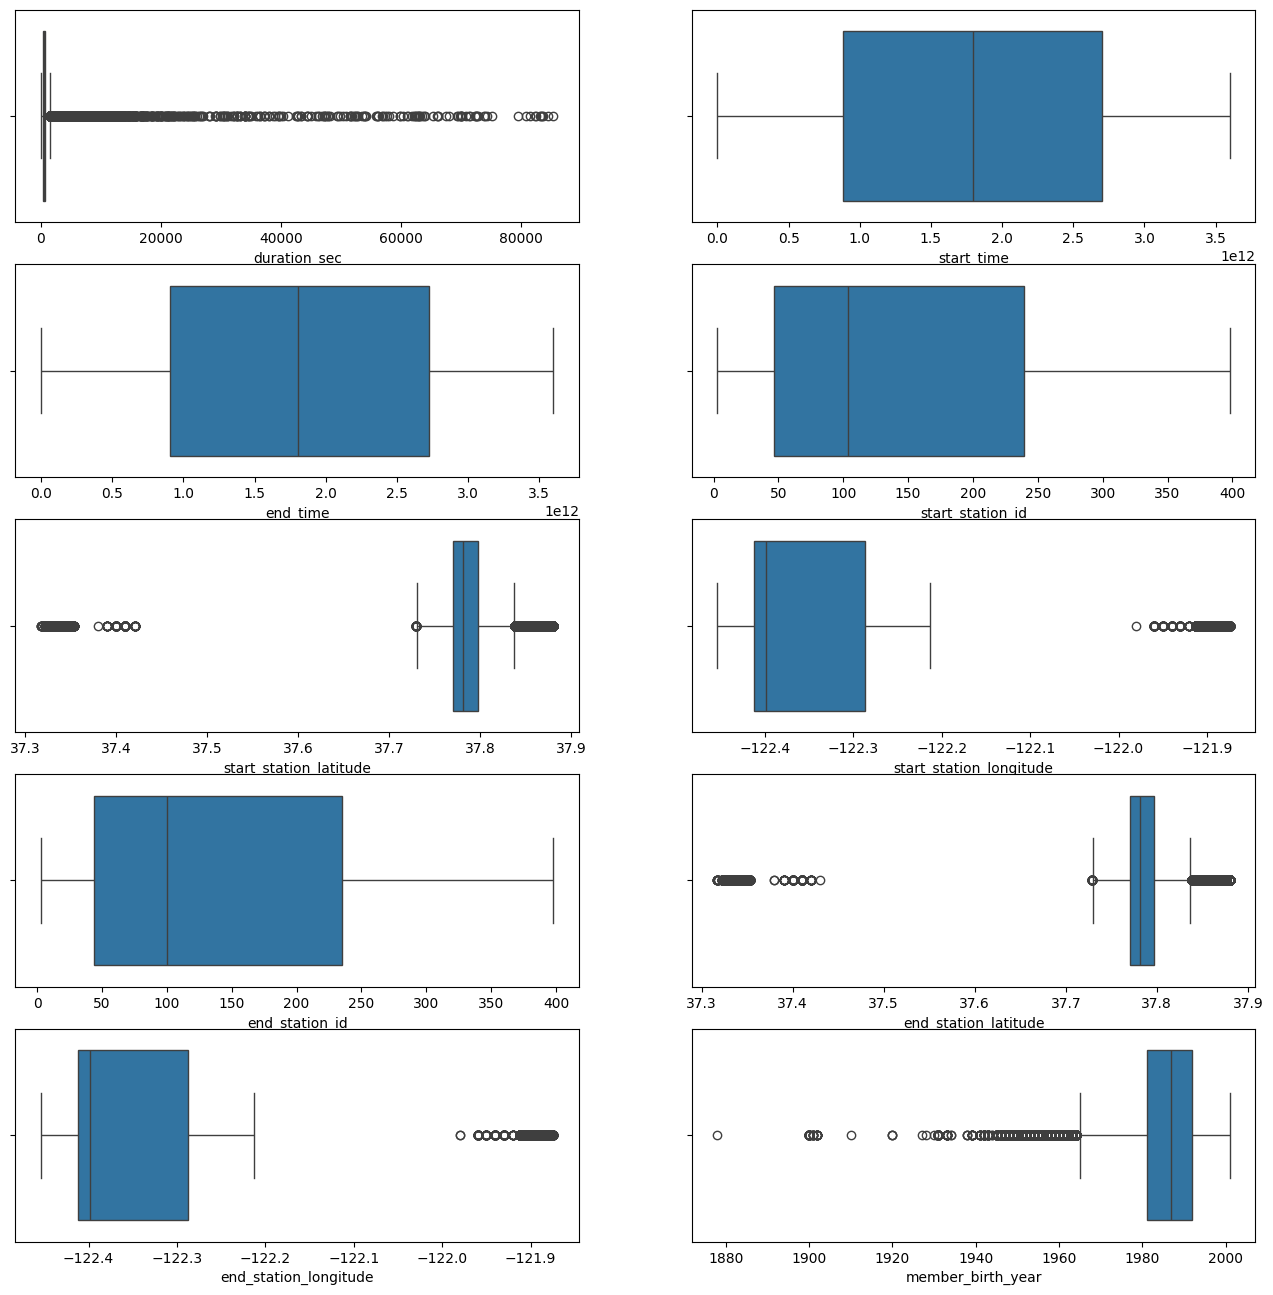

In [93]:
fig , ax = plt.subplots(5 , 2 , figsize= (16 ,16) )
ax = ax.flatten()

for i in range (10):
    sns.boxplot(data= df , x = numeric_columns[i] , ax =ax[i])

In [96]:
Q1 = df[numeric_columns].quantile(0.25)
Q3 = df[numeric_columns].quantile(0.75)
IQR = Q3 - Q1

lower_fence = Q1 - 1.5 * IQR
upper_fence = Q3 + 1.5 * IQR

df_clipped = df.copy()

for col in range (10):
    df_clipped[numeric_columns[col]] = df_clipped[numeric_columns[col]].apply(lambda x: min(x, upper_fence[numeric_columns[col]]) if x > upper_fence[numeric_columns[col]] else x)
    
    df_clipped[numeric_columns[col]] = df_clipped[numeric_columns[col]].apply(lambda x: max(x, lower_fence[numeric_columns[col]]) if x < lower_fence[numeric_columns[col]] else x)



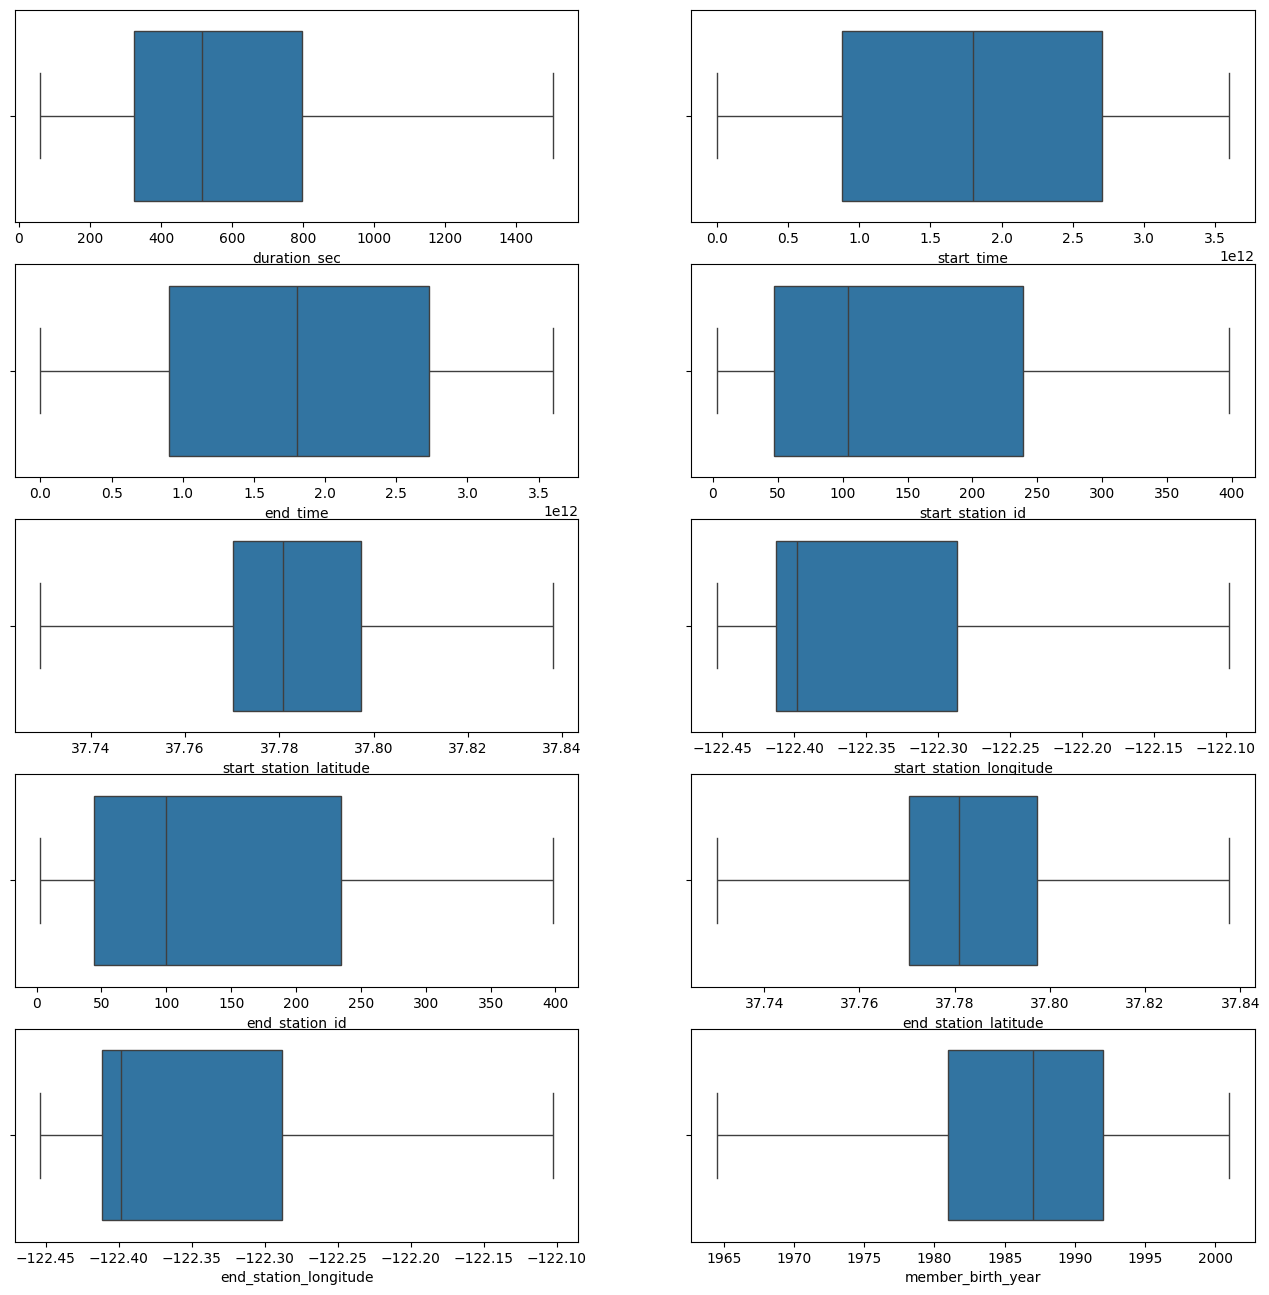

In [97]:
fig , ax = plt.subplots(5 , 2 , figsize= (16 ,16) )
ax = ax.flatten()

for i in range (10):
    sns.boxplot(data= df_clipped , x = numeric_columns[i] , ax =ax[i])

# feature scaling

In [98]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_clipped[['duration_sec', 'start_time_seconds', 'end_time_seconds' ]] = scaler.fit_transform(
    df_clipped[['duration_sec', 'start_time_seconds', 'end_time_seconds']]
)


<Figure size 1000x600 with 0 Axes>

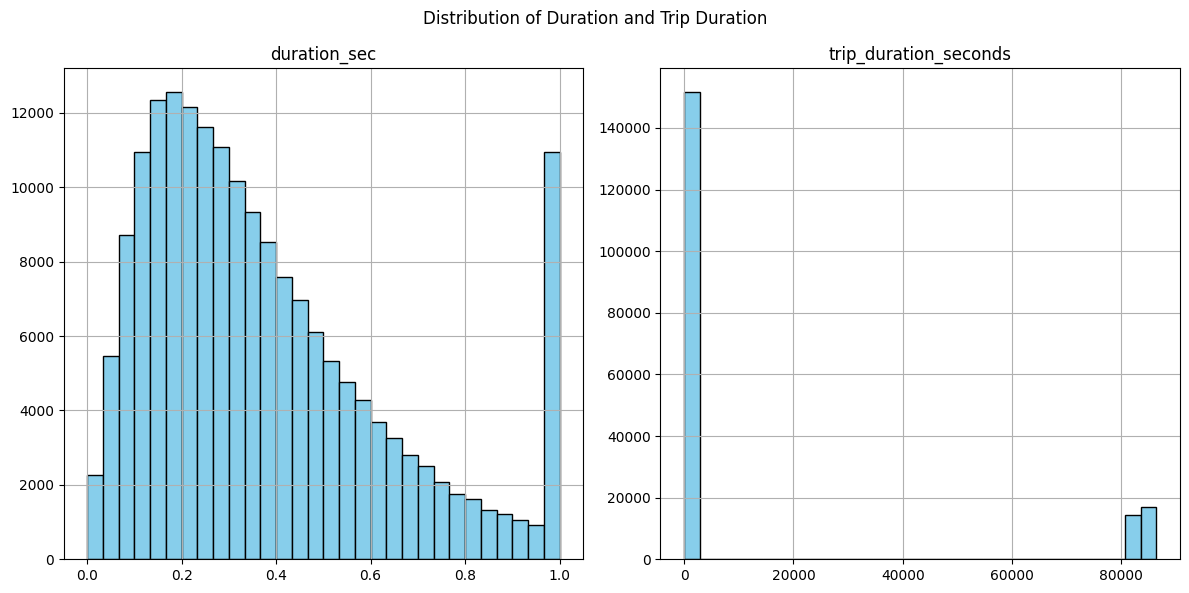

In [99]:
plt.figure(figsize=(10, 6))
df_clipped[['duration_sec', 'trip_duration_seconds']].hist(bins=30, figsize=(12, 6), color='skyblue', edgecolor='black')
plt.suptitle('Distribution of Duration and Trip Duration')
plt.tight_layout()
plt.show()

In [100]:
df_clipped.drop(columns= ['start_station_id' , 'end_station_id'] , axis= 1 , inplace = True)

In [101]:
numeric_columns = df_clipped.select_dtypes('number').columns.tolist()
len(numeric_columns)

19

In [102]:
numeric_columns

['duration_sec',
 'start_time',
 'end_time',
 'start_station_latitude',
 'start_station_longitude',
 'end_station_latitude',
 'end_station_longitude',
 'member_birth_year',
 'start_time_seconds',
 'end_time_seconds',
 'adjusted_end_time_seconds',
 'trip_duration_seconds',
 'Customer',
 'Subscriber',
 'male',
 'female',
 'other',
 'bike_share_for_all_trip_No',
 'bike_share_for_all_trip_Yes']

In [103]:
# Take a 20% random sample from the data
df_sample = df_clipped.sample(frac=0.1, random_state=22)


In [104]:
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18341 entries, 164523 to 1690
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype          
---  ------                       --------------  -----          
 0   duration_sec                 18341 non-null  float64        
 1   start_time                   18341 non-null  timedelta64[ns]
 2   end_time                     18341 non-null  timedelta64[ns]
 3   start_station_name           18341 non-null  category       
 4   start_station_latitude       18341 non-null  float64        
 5   start_station_longitude      18341 non-null  float64        
 6   end_station_name             18341 non-null  category       
 7   end_station_latitude         18341 non-null  float64        
 8   end_station_longitude        18341 non-null  float64        
 9   member_birth_year            18341 non-null  float64        
 10  start_time_seconds           18341 non-null  float64        
 11  end_time_seconds             

In [105]:
df_sample['trip_duration_seconds']

164523      480.3
120830      160.5
72816       453.0
147365    82995.2
120827      384.7
           ...   
16732       793.0
52420       229.2
170146      642.9
75012       257.9
1690       1011.8
Name: trip_duration_seconds, Length: 18341, dtype: float64

In [106]:
df_sample['Subscriber'].unique()

array([1., 0.])

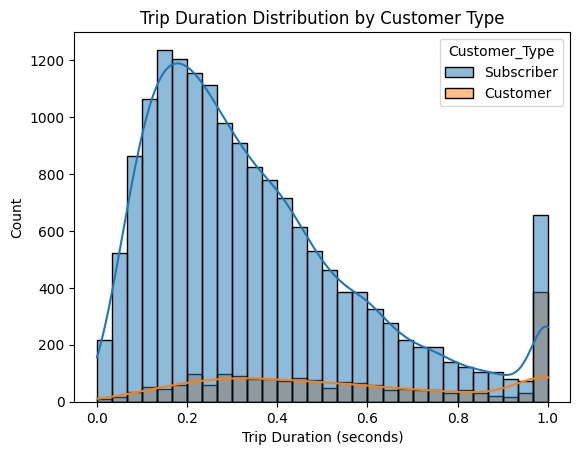

In [ ]:

df_sample['Customer_Type'] = df_sample['Customer'].map({0: 'Subscriber', 1: 'Customer'})

sns.histplot(data=df_sample, x="duration_sec", hue="Customer_Type", kde=True, bins=30)

plt.xlabel("Trip Duration (seconds)")
plt.ylabel("Count")
plt.title("Trip Duration Distribution by Customer Type")
plt.show()


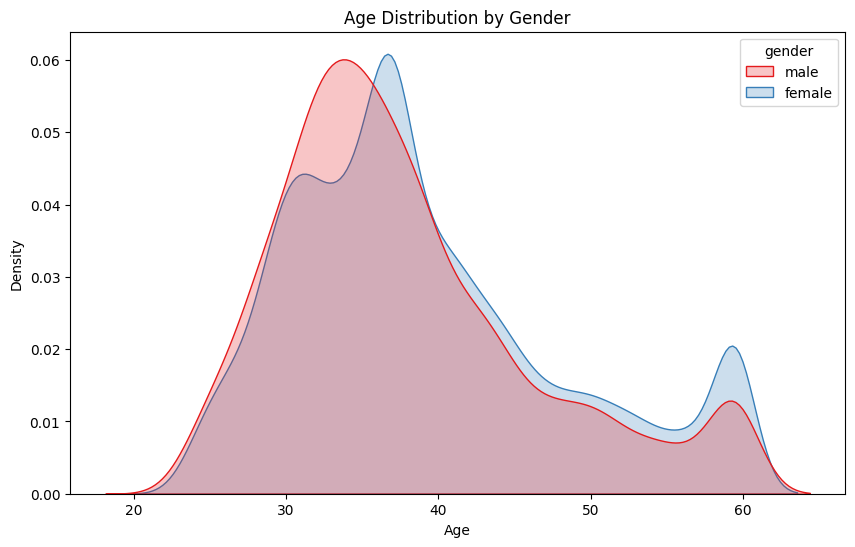

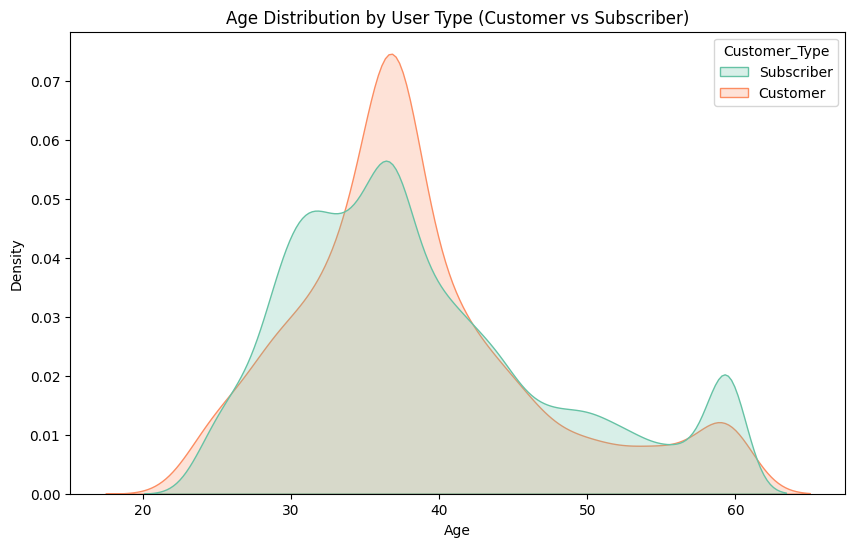

In [ ]:

current_year = 2024
df_sample['age'] = current_year - df_sample['member_birth_year']


df_sample['gender'] = df_sample['male'].map({0: 'female', 1: 'male'})  

plt.figure(figsize=(10, 6))
sns.kdeplot(data=df_sample, x="age", hue="gender", fill=True, common_norm=False, palette="Set1")

plt.title("Age Distribution by Gender")
plt.xlabel("Age")
plt.ylabel("Density")
plt.show()


plt.figure(figsize=(10, 6))
sns.kdeplot(data=df_sample, x="age", hue="Customer_Type", fill=True, common_norm=False, palette="Set2")

plt.title("Age Distribution by User Type (Customer vs Subscriber)")
plt.xlabel("Age")
plt.ylabel("Density")
plt.show()
